In this notebook the Homework for the Adv. Char. Methods class will be solved

In [1]:
import numpy as np
import matplotlib.pyplot as plt

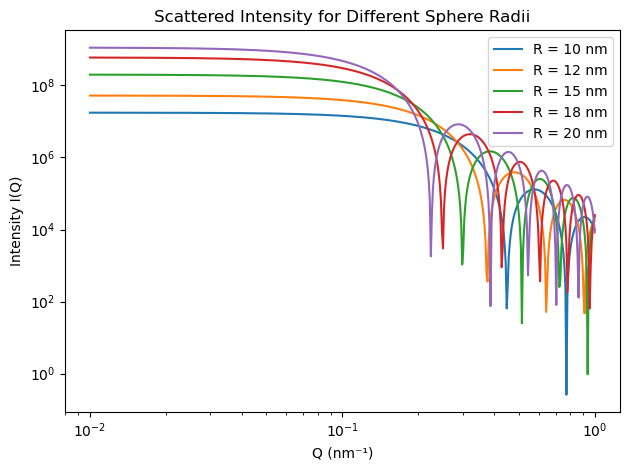

In [2]:
# 1. Defining the functions K(Q, R) and I(Q, R)
def K(Q, R, delta_eta=1):
    V = (4/3) * np.pi * R**3
    QR = Q * R
    f_QR = (np.sin(QR) - QR * np.cos(QR)) / (QR**3)
    return V * delta_eta * 3 * f_QR

def I(Q, R):
    return K(Q, R)**2

#Calculating and plotting the Intensities (Task 1)
Q = np.logspace(-2, 0, 500)  # Q from 0.01 to 1 nm^-1
radii = [10, 12, 15, 18, 20]

for R in radii:
    plt.plot(Q, I(Q, R), label=f'R = {R} nm')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Q (nm⁻¹)')
plt.ylabel('Intensity I(Q)')
plt.legend()
plt.title('Scattered Intensity for Different Sphere Radii')
plt.tight_layout()
plt.show()

Low Q behavior (Q < 0.1nm^-1):
- All curves plateau at low Q, with higher intensities for larger radii
- vertical offset increases with particle size
-> larger spheres have much higher intensities at low Q due to R^6 dependance
-> this is the Guinier-Regime, where you can extract size related parameters

Oscillations and Minima (Intermediate Q):
- oscillations and minima appear for all radii
- the first minima shift leftward (to lower Q) as R increases
-> form factor oscillations (typical for monodisperse spheres)
-> position depends inversely of radius
-> larger spheres show first minima at lower Q (useful for particle size determination)

High Q behavior (Porod-Regime, Q > 0.3 nm^-1):
- all curves drop of steeply
- slopes begin to align and follow a power-law decay
- in this Porod Regime the scattering intensity for sharp interfaces is proportional to Q^-4

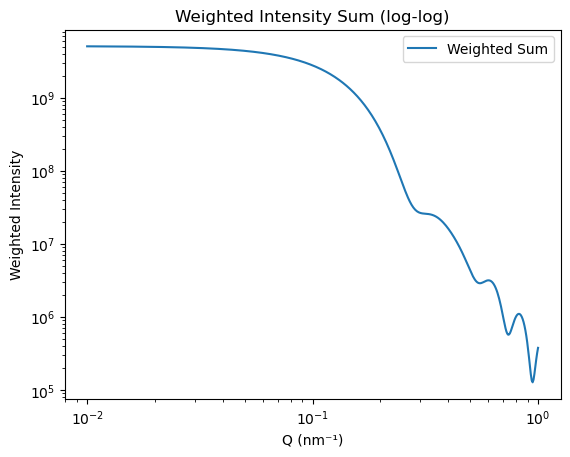

In [3]:
# 3. Weighted Sum (Task 3)
weights = {10:1, 20:1, 12:3, 18:3, 15:10}
total_I = np.zeros_like(Q)

for R, count in weights.items():
    total_I += count * I(Q, R)

plt.plot(Q, total_I, label='Weighted Sum')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Q (nm⁻¹)')
plt.ylabel('Weighted Intensity')
plt.title('Weighted Intensity Sum (log-log)')
plt.legend()
plt.show()

Low-Q Behavior (Guinier Region):
- At small Q values (around Q = 0.01 \,\text{nm}^{-1}), the intensity plateaus. This plateau corresponds to the total scattering contrast, which is dominated by the overall particle volume. In this case, the largest contribution comes from the 15 nm particles, which are present in the highest quantity (10 particles).

Intermediate Q (Transition & Oscillations):
- In the mid-Q range, the intensity curve shows broad, less distinct oscillations. This smearing is caused by the polydispersity of the sample — since multiple particle sizes are present, their individual form factor oscillations overlap and dampen each other. Nevertheless, some residual oscillatory features are still visible.

High-Q Behavior (Porod Region):
- At higher Q values (e.g. Q > 0.6\,\text{nm}^{-1}), the intensity decays roughly linearly on the log-log scale. This behavior follows the Porod law, indicating:
I(Q) \propto Q^{-4}
This power-law decay is characteristic of particles with sharp interfaces between the particle and surrounding medium.

Overall, the combined intensity reflects the expected features of a polydisperse spherical particle mixture, with Guinier behavior at low Q, smeared form factor oscillations in the intermediate range, and Porod behavior at high Q.

/var/folders/yr/cvypfzc11jsc27lfvbp3d66w0000gn/T/ipykernel_50518/2825676177.py:5: RuntimeWarning: invalid value encountered in divide
  f_QR = (np.sin(QR) - QR * np.cos(QR)) / (QR**3)


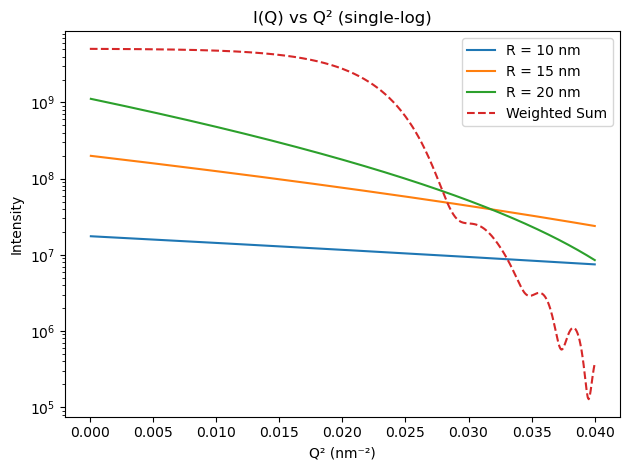

In [5]:
# 4. Q^2 plot (Task 4)
Q2 = np.linspace(0, 0.04, 500)
Q = np.sqrt(Q2)

for R in [10, 15, 20]:
    plt.plot(Q2, I(Q, R), label=f'R = {R} nm')

plt.plot(Q2, total_I, label='Weighted Sum', linestyle='--')
plt.yscale('log')
plt.xlabel('Q² (nm⁻²)')
plt.ylabel('Intensity')
plt.title('I(Q) vs Q² (single-log)')
plt.legend()
plt.tight_layout()
plt.show()

This plot shows the scattering intensity I(Q) as a function of the squared scattering vector Q^2 on a semi-logarithmic scale (linear Q^2, logarithmic intensity). This representation emphasizes the low-Q (Guinier) region and is useful for estimating the radius of gyration R_g.

Guinier Region (Low Q^2)
- For small values of Q^2, each intensity curve shows a smooth decay that appears approximately linear on the semi-log scale. This is characteristic of the Guinier approximation, where the intensity follows:
I(Q) \approx I(0) \cdot \exp\left(-\frac{R_g^2 Q^2}{3}\right)
The slope of the linear region reflects the size of the particles: larger radii result in steeper slopes. Therefore, the 20 nm particle curve drops more steeply than the 10 nm one.

- Transition Region
- As Q^2 increases, the curves begin to deviate from the linear Guinier behavior. This marks the transition to the form factor oscillation regime. The deviation occurs earlier for larger particles because their characteristic length scales are larger.

Weighted Sum Behavior
- The weighted sum of intensities (which combines all radii with given proportions) exhibits a smoothed-out curve. The Guinier-like decay at low Q^2 is still visible, but transitions into a more complex shape due to the overlap of signals from different particle sizes. The shape is primarily influenced by the dominant 15 nm particles.

High Q^2 Behavior
- At higher Q^2, the intensity decay becomes flatter for smaller particles, while it continues for larger ones. This is due to the breakdown of the Guinier approximation and the onset of form factor and Porod scattering regimes.
